In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [ ]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# checking the number of rows and columns
car_dataset.shape

(301, 10)

In [ ]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [ ]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,0,0,0,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,0,0,0,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = car_dataset.drop(['Car_Name','company','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [ ]:
# Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)
lin_reg_pred = lin_reg_model.predict(X_test)

In [ ]:
# Decision Tree Model
dec_tree_model = DecisionTreeRegressor()
dec_tree_model.fit(X_train, Y_train)
dec_tree_pred = dec_tree_model.predict(X_test)

In [ ]:
# Random Forest Model
rand_forest_model = RandomForestRegressor()
rand_forest_model.fit(X_train, Y_train)
rand_forest_pred = rand_forest_model.predict(X_test)

In [ ]:
# R squared Error for individual models
lin_reg_error = metrics.r2_score(Y_test, lin_reg_pred)
dec_tree_error = metrics.r2_score(Y_test, dec_tree_pred)
rand_forest_error = metrics.r2_score(Y_test, rand_forest_pred)

In [ ]:
# Print R squared Error for all models
print("R squared Error for Linear Regression: ", lin_reg_error)
print("R squared Error for Decision Tree: ", dec_tree_error)
print("R squared Error for Random Forest: ", rand_forest_error)


R squared Error for Linear Regression:  0.8365766715027051
R squared Error for Decision Tree:  0.9526888016397863
R squared Error for Random Forest:  0.9851850211565513


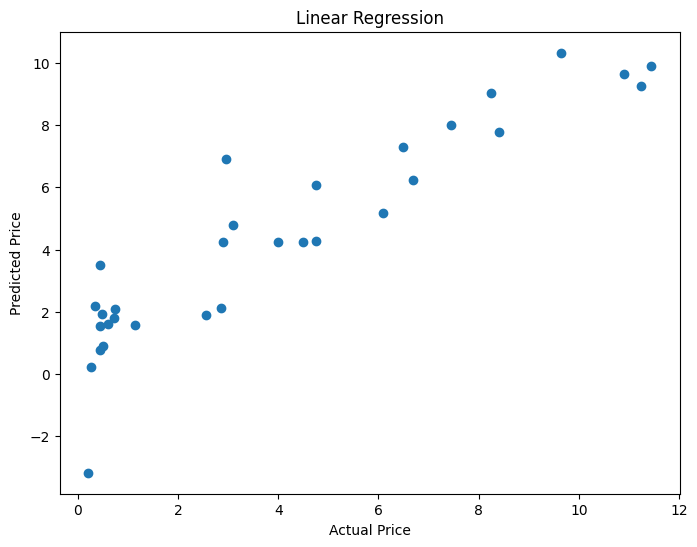

In [ ]:
# Plot Actual vs Predicted Prices for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, lin_reg_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression")
plt.show()



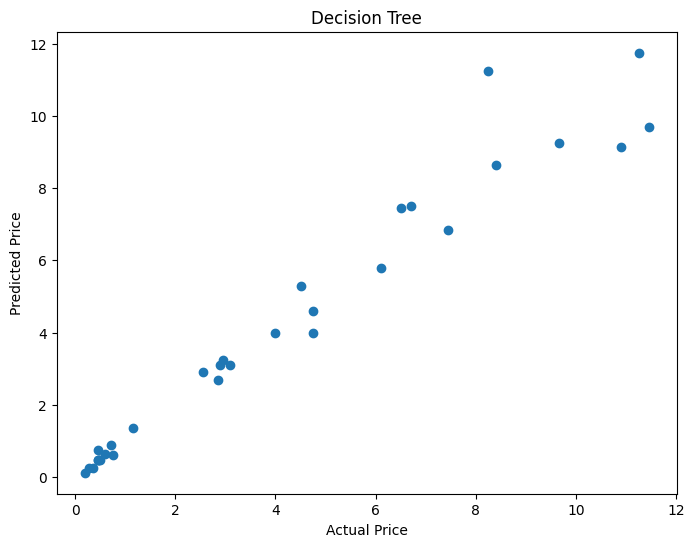

In [ ]:
# Plot Actual vs Predicted Prices for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, dec_tree_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree")
plt.show()


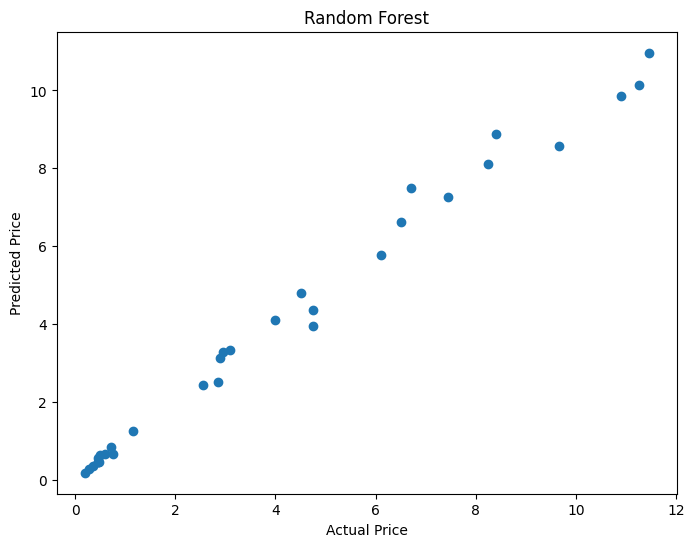

In [ ]:
# Plot Actual vs Predicted Prices for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, rand_forest_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest")
plt.show()

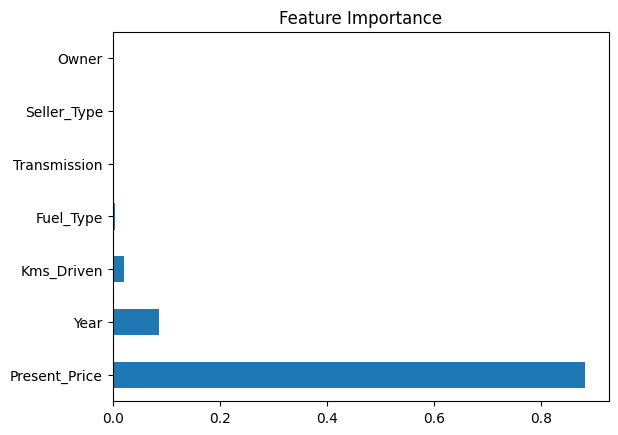

In [ ]:
feature_importances = pd.Series(rand_forest_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()
